In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams.update({'font.size': 18}) # Set global font size to 12, adjust as needed

In [5]:
!pip install openpyxl

## NOTE: This script does not include panel degradation

## Consumption vs Generation

In [20]:
PV = 0.575 # [kW]
mH = [66,92,109,115,119,124,125,118,104,85,56,52] #monthly generation hours Jan - Dec
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] # used for plotting
roofA = 2381+2349 # surface area of rooftop
parking1 = 2215 # parking lot configuration
parking2 = 2215+4615
parking3 = 4089+2215+4615
parking4 = 7891+2215+4615
parking5 = 7891+2215+4615+4089

genArea = [roofA,roofA+parking1,roofA+parking2,roofA+parking3,roofA+parking4,roofA+parking5] #combinations of rooftop and parking lot areas
pArea = 2.278 * 1.134 # solar panel surface area [m^2] https://cansolarcorp.com/solar-modules/bauer-premium-protect-topcon/
numPanels = [i * 0.8 / pArea for i in genArea] # number of panels (unrounded)

gen = [i * PV for i in numPanels] # generation for each surface area configuration [kW]

totGen1 = [i * gen[0] for i in mH] # generation for surface area configuration 1 for each mounth [kWh]
totGen2 = [i * gen[1] for i in mH] # generation for surface area configuration 2 for each mounth [kWh]
totGen3 = [i * gen[2] for i in mH] # generation for surface area configuration 3 for each mounth [kWh]
totGen4 = [i * gen[3] for i in mH] # generation for surface area configuration 4 for each mounth [kWh] 
totGen5 = [i * gen[4] for i in mH] # generation for surface area configuration 5 for each mounth [kWh]
totGen6 = [i * gen[5] for i in mH] # generation for surface area configuration 5 for each mounth [kWh]

totGen = [sum(totGen1),sum(totGen2),sum(totGen3),sum(totGen4),sum(totGen5),sum(totGen6)]

wrp = [53426.50,49977.50,56568.00,49531.75,64092.80,88062.40,137115.60,105491.40,79462.60,108207.75,81892.25,57238.75] # average power consumption for the WRP from excel file

print(gen) # print configuration sizes
print(sum(totGen1))

[842.2716792631923, 1236.6970005249198, 2058.490615704546, 2786.619346467166, 3463.6419520821046, 4191.770682844724]
981246.506341619


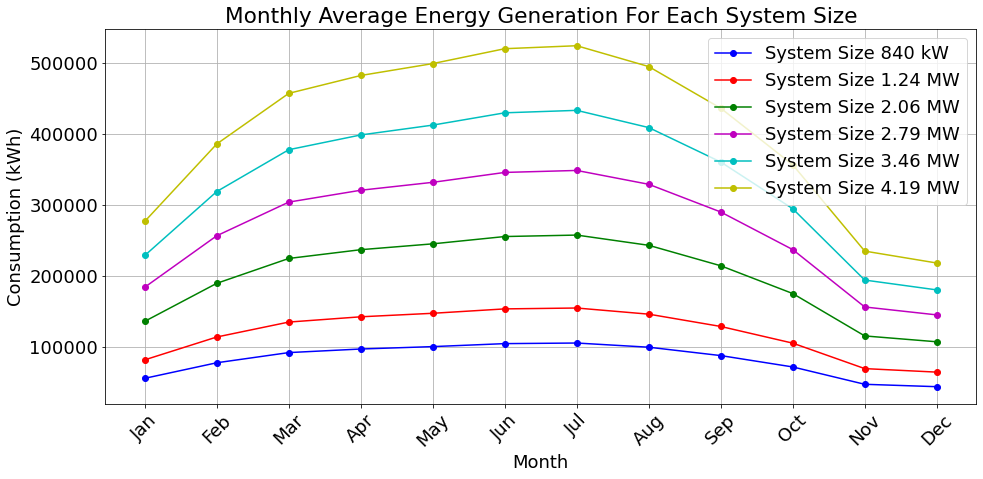

In [21]:
#Plot of the power generated for each configuration and the power consumption of the WRP
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Monthly Average Energy Generation For Each System Size')
plt.xlabel('Month')
plt.ylabel('Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(months, totGen1, marker='o', linestyle='-', color='b', label='System Size 840 kW')
ax1.plot(months, totGen2, marker='o', linestyle='-', color='r', label='System Size 1.24 MW')
ax1.plot(months, totGen3, marker='o', linestyle='-', color='g', label='System Size 2.06 MW')
ax1.plot(months, totGen4, marker='o', linestyle='-', color='m', label='System Size 2.79 MW')
ax1.plot(months, totGen5, marker='o', linestyle='-', color='c', label='System Size 3.46 MW')
ax1.plot(months, totGen6, marker='o', linestyle='-', color='y', label='System Size 4.19 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


## Costs vs Revenue

In [26]:
projLife = 30 # project lifespan in years
costSol = 450 # approximate $/kW per CANSOLAR
costRoof = 300 # approximate $/kW per Hayter Group
costCarport = costRoof * 10 # approximate $/kW per Hayter Group
bat = 2789692.15 # cost of Tesla Megapack in CAD
trans = 388416.66 # https://www.larsonelectronics.com/product/282374/5-mva-pad-mount-transformer-480v-delta-primary-21600y-12470-grounded-wye-secondary-knan-bell-green?utm_campaign=20417422929&utm_source=google&utm_medium=cpc&utm_content=&keyword=&adgroupid=&gad_source=1&gclid=Cj0KCQiAxOauBhCaARIsAEbUSQTmYmdHeF33ObE_SgbDpLif5siC51MRq3I2RXI3Mlt_F6e2AvHPcPkaAg3wEALw_wcB


costInstRoof = costRoof * gen[0] # cost of installation for just rooftop of WRP
costInstCarport1 = costCarport * (gen[1]-gen[0]) # cost of installation for rooftop and parking lots of WRP
costInstCarport2 = costCarport * (gen[2]-gen[0])
costInstCarport3 = costCarport * (gen[3]-gen[0])
costInstCarport4 = costCarport * (gen[4]-gen[0])
costInstCarport5 = costCarport * (gen[5]-gen[0])

totCost1 = gen[0] * costSol + costInstRoof + trans
totCost2 = gen[1] * costSol + costInstRoof + costInstCarport1 + trans
totCost3 = gen[2] * costSol + costInstRoof + costInstCarport2 + trans
totCost4 = gen[3] * costSol + costInstRoof + costInstCarport3 + trans
totCost5 = gen[4] * costSol + costInstRoof + costInstCarport4 + trans
totCost6 = gen[5] * costSol + costInstRoof + costInstCarport5 + trans

totCost = [totCost1,totCost2,totCost3,totCost4,totCost5,totCost6] # approx cost of panels for each surface area configuration [$CAD] without batteries
config = [0.84,1.24,2.06,2.79,3.46,4.19] # list of configuration sizes
buyback = [0.1,0.13,0.16,0.19,0.22,0.25,0.28,0.31,0.34,0.37,0.4] # range of buyback pricing from 10 c/kWh to 40 c/kWh

newCost = [i + bat for i in totCost] # approx cost of panels for each surface area configuration [$CAD] with batteries


#Amount of yearly revenue for each config based on the buyback pricing
rev1 = [i * totGen[0] for i in buyback]
rev2 = [i * totGen[1] for i in buyback]
rev3 = [i * totGen[2] for i in buyback]
rev4 = [i * totGen[3] for i in buyback]
rev5 = [i * totGen[4] for i in buyback]
rev6 = [i * totGen[5] for i in buyback]

#Payback period total cost of panels divided by revenue per year
payback1 = [totCost[0] / i for i in rev1]
payback2 = [totCost[1] / i for i in rev2]
payback3 = [totCost[2] / i for i in rev3]
payback4 = [totCost[3] / i for i in rev4]
payback5 = [totCost[4] / i for i in rev5]
payback6 = [totCost[5] / i for i in rev6]

#Payback period total cost of panels divided by revenue per year with batteries
newPayback1 = [newCost[0] / i for i in rev1]
newPayback2 = [newCost[1] / i for i in rev2]
newPayback3 = [newCost[2] / i for i in rev3]
newPayback4 = [newCost[3] / i for i in rev4]
newPayback5 = [newCost[4] / i for i in rev5]
newPayback6 = [newCost[5] / i for i in rev6]

#Find ROI = net return / cost of investments
ROI1 = [i*100*projLife/totCost[0] for i in rev1]
ROI2 = [i*100*projLife/totCost[1] for i in rev2]
ROI3 = [i*100*projLife/totCost[2] for i in rev3]
ROI4 = [i*100*projLife/totCost[3] for i in rev4]
ROI5 = [i*100*projLife/totCost[4] for i in rev5]
ROI6 = [i*100*projLife/totCost[5] for i in rev6]

'''
# Find IRR = (Future Value/Present Value)^(1/periods)-1
inv = [-newCost[0],-newCost[1],-newCost[2],-newCost[3],-newCost[4],-newCost[5]];

cashFlows1 = [[0]*projLife]*len(rev1)
for i in range(len(rev1)):
    for j in range(projLife):
        if(j==0):
            cashFlows1[i][j] = [inv[0]+rev1[i]];
        else:
            cashFlows1[i][j] = [rev1[i]];
print(cashFlows1)

cashFlows2 = [[0]*projLife]*len(rev2)
for i in range(len(rev2)):
    for j in range(projLife):
        if(j==0):
            cashFlows2[i][j] = [inv[1]+rev2[i]];
        else:
            cashFlows2[i][j] = [rev2[i]];

cashFlows3 = [[0]*projLife]*len(rev3)
for i in range(len(rev3)):
    for j in range(projLife):
        if(j==0):
            cashFlows3[i][j] = [inv[2]+rev3[i]];
        else:
            cashFlows3[i][j] = [rev3[i]];
        
cashFlows4 = [[0]*projLife]*len(rev4)
for i in range(len(rev4)):
    for j in range(projLife):
        if(j==0):
            cashFlows4[i][j] = [inv[3]+rev4[i]];
        else:
            cashFlows4[i][j] = [rev4[i]];
        
cashFlows5 = [[0]*projLife]*len(rev5)
for i in range(len(rev5)):
    for j in range(projLife):
        if(j==0):
            cashFlows5[i][j] = [inv[4]+rev5[i]];
        else:
            cashFlows5[i][j] = [rev5[i]];
        
cashFlows6 = [[0]*projLife]*len(rev6)
for i in range(len(rev6)):
    for j in range(projLife):
        if(j==0):
            cashFlows6[i][j] = [inv[5]+rev6[i]];
        else:
            cashFlows6[i][j] = [rev6[i]];

#print(cashFlows2)
#print(cashFlows1[0])

irr1 = [0]*len(rev1)
for i in range(len(cashFlows1)):
    #irr1[i] = round(np.irr(cashFlows1[0][i]),30);
    print(cashFlows1[0][i])


irr1 = round(np.irr(cashFlows1),4);
irr2 = round(np.irr(cashFlows2),4);
irr3 = round(np.irr(cashFlows3),4);
irr4 = round(np.irr(cashFlows4),4);
irr5 = round(np.irr(cashFlows5),4);
irr6 = round(np.irr(cashFlows6),4);

IRR = [irr1,irr2,irr3,irr4,irr5,irr6]

print("Internal rate of return:%3.4f"%irr1);
'''


'\n# Find IRR = (Future Value/Present Value)^(1/periods)-1\ninv = [-newCost[0],-newCost[1],-newCost[2],-newCost[3],-newCost[4],-newCost[5]];\n\ncashFlows1 = [[0]*projLife]*len(rev1)\nfor i in range(len(rev1)):\n    for j in range(projLife):\n        if(j==0):\n            cashFlows1[i][j] = [inv[0]+rev1[i]];\n        else:\n            cashFlows1[i][j] = [rev1[i]];\nprint(cashFlows1)\n\ncashFlows2 = [[0]*projLife]*len(rev2)\nfor i in range(len(rev2)):\n    for j in range(projLife):\n        if(j==0):\n            cashFlows2[i][j] = [inv[1]+rev2[i]];\n        else:\n            cashFlows2[i][j] = [rev2[i]];\n\ncashFlows3 = [[0]*projLife]*len(rev3)\nfor i in range(len(rev3)):\n    for j in range(projLife):\n        if(j==0):\n            cashFlows3[i][j] = [inv[2]+rev3[i]];\n        else:\n            cashFlows3[i][j] = [rev3[i]];\n        \ncashFlows4 = [[0]*projLife]*len(rev4)\nfor i in range(len(rev4)):\n    for j in range(projLife):\n        if(j==0):\n            cashFlows4[i][j] = 

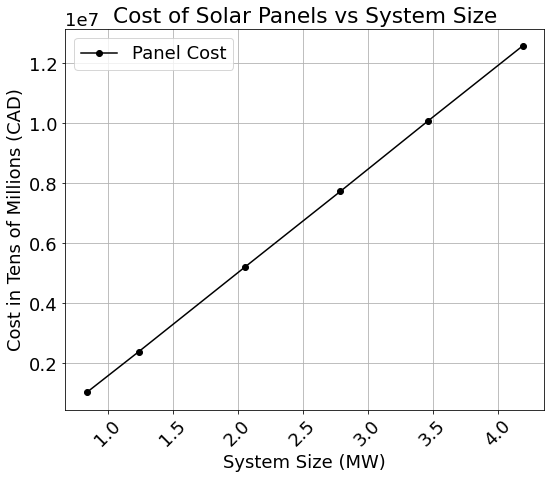

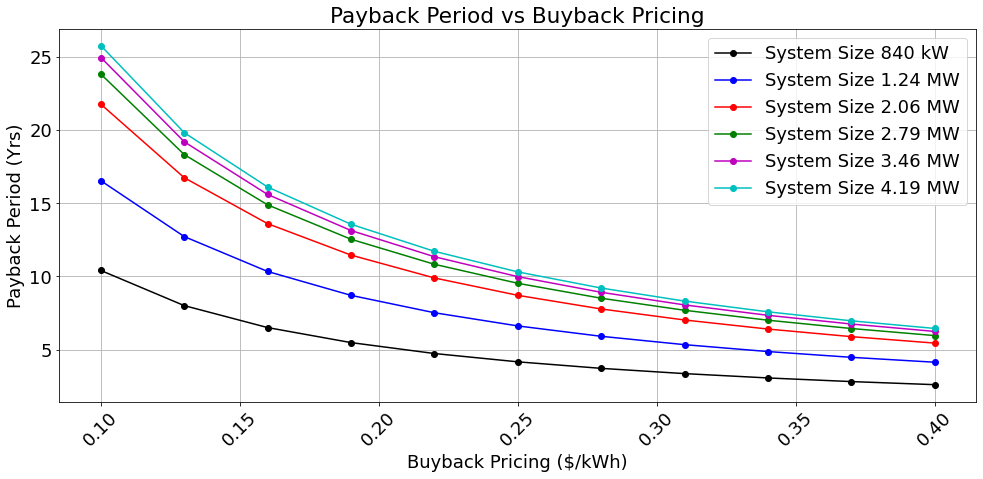

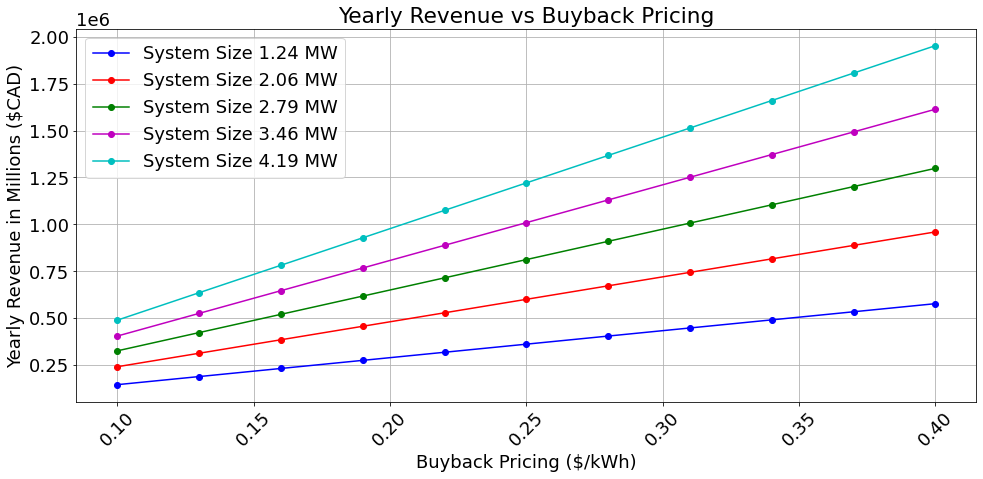

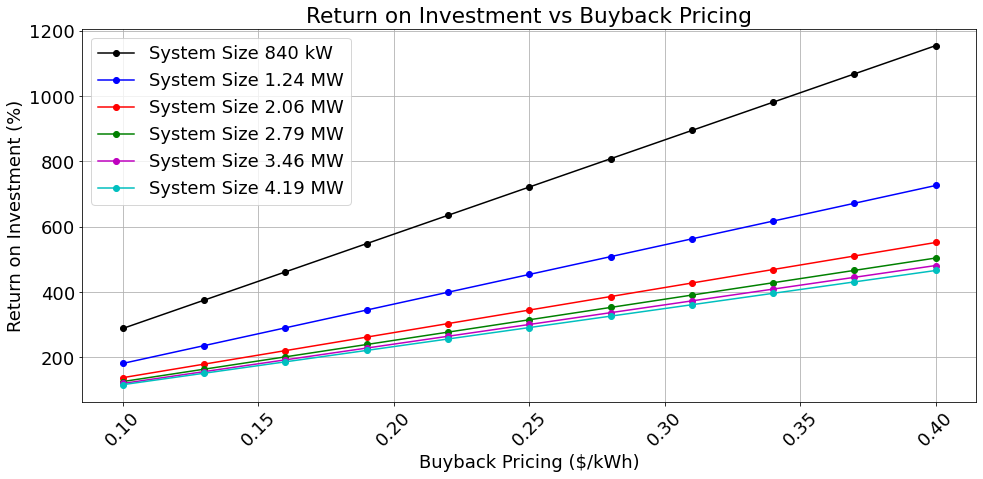

In [27]:
#Plot of the total cost of the solar panels for each configuration
fig, ax1 = plt.subplots(figsize=(8, 7))
plt.title('Cost of Solar Panels vs System Size')
plt.xlabel('System Size (MW)')
plt.ylabel('Cost in Tens of Millions (CAD)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(config, totCost, marker='o', linestyle='-', color='k', label='Panel Cost')

plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()





#Plot of the payback period in years for each configuration
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Payback Period vs Buyback Pricing')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Payback Period (Yrs)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, payback1, marker='o', linestyle='-', color='k', label='System Size 840 kW')
ax1.plot(buyback, payback2, marker='o', linestyle='-', color='b', label='System Size 1.24 MW')
ax1.plot(buyback, payback3, marker='o', linestyle='-', color='r', label='System Size 2.06 MW')
ax1.plot(buyback, payback4, marker='o', linestyle='-', color='g', label='System Size 2.79 MW')
ax1.plot(buyback, payback5, marker='o', linestyle='-', color='m', label='System Size 3.46 MW')
ax1.plot(buyback, payback6, marker='o', linestyle='-', color='c', label='System Size 4.19 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()




'''
#Plot of the payback period in years for each configuration with batteries
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Payback Period vs Buyback Pricing (incl Batteries)')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Payback Period (Yrs)')
plt.xticks(rotation=45)
plt.grid(True)

#ax1.plot(buyback, newPayback1, marker='o', linestyle='-', color='k', label='System Size 840 kW')
ax1.plot(buyback, newPayback2, marker='o', linestyle='-', color='b', label='System Size 1.24 MW')
ax1.plot(buyback, newPayback3, marker='o', linestyle='-', color='r', label='System Size 2.06 MW')
ax1.plot(buyback, newPayback4, marker='o', linestyle='-', color='g', label='System Size 2.79 MW')
ax1.plot(buyback, newPayback5, marker='o', linestyle='-', color='m', label='System Size 3.46 MW')
ax1.plot(buyback, newPayback6, marker='o', linestyle='-', color='c', label='System Size 4.19 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
'''



#Plot of the yearly revenue for each configuration with batteries
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Yearly Revenue vs Buyback Pricing')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Yearly Revenue in Millions ($CAD)')
plt.xticks(rotation=45)
plt.grid(True)

#ax1.plot(buyback, rev1, marker='o', linestyle='-', color='k', label='System Size 840 kW')
ax1.plot(buyback, rev2, marker='o', linestyle='-', color='b', label='System Size 1.24 MW')
ax1.plot(buyback, rev3, marker='o', linestyle='-', color='r', label='System Size 2.06 MW')
ax1.plot(buyback, rev4, marker='o', linestyle='-', color='g', label='System Size 2.79 MW')
ax1.plot(buyback, rev5, marker='o', linestyle='-', color='m', label='System Size 3.46 MW')
ax1.plot(buyback, rev6, marker='o', linestyle='-', color='c', label='System Size 4.19 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


#Plot of the payback period in years for each configuration
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Return on Investment vs Buyback Pricing')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Return on Investment (%)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, ROI1, marker='o', linestyle='-', color='k', label='System Size 840 kW')
ax1.plot(buyback, ROI2, marker='o', linestyle='-', color='b', label='System Size 1.24 MW')
ax1.plot(buyback, ROI3, marker='o', linestyle='-', color='r', label='System Size 2.06 MW')
ax1.plot(buyback, ROI4, marker='o', linestyle='-', color='g', label='System Size 2.79 MW')
ax1.plot(buyback, ROI5, marker='o', linestyle='-', color='m', label='System Size 3.46 MW')
ax1.plot(buyback, ROI6, marker='o', linestyle='-', color='c', label='System Size 4.19 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Separate rooftop and parking lot cases

In [30]:
PV = 0.575 # [kW]
mH = [66,92,109,115,119,124,125,118,104,85,56,52] #monthly generation hours Jan - Dec
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] # used for plotting


roofA = 2381+2349 # rooftop configurations

# the two follow cases are just random values
roofB = 2381+2349+4615
roofC = 2381+2349+2215+4615

parking1 = 7891 # parking lot configurations
parking2 = 7891+2215
parking3 = 7891+2215+4615
parking4 = 7891+2215+4615+4089

roofGen = [roofA,roofB,roofC] #combinations of rooftops

parkingGen = [parking1,parking2,parking3,parking4] #combinations of parking lots

panelArea = 2.278 * 1.134 # solar panel surface area [m^2] https://cansolarcorp.com/solar-modules/bauer-premium-protect-topcon/
roofPanels = [i * 0.8 / panelArea for i in roofGen] # number of panels on rooftop (unrounded)
parkingPanels = [i * 0.8 / panelArea for i in parkingGen] # number of panels in parking lots (unrounded)

rgen = [i * PV for i in roofPanels] # generation for each surface area configuration [kW]
pgen = [i * PV for i in parkingPanels] # generation for each surface area configuration [kW]

rtotGen1 = [i * rgen[0] for i in mH] # generation for rooftop configurations for each mounth [kWh]
rtotGen2 = [i * rgen[1] for i in mH]
rtotGen3 = [i * rgen[2] for i in mH]

rtotGen = [sum(rtotGen1),sum(rtotGen2),sum(rtotGen3)]

ptotGen1 = [i * pgen[0] for i in mH] # generation for parking lot configurations for each mounth [kWh]
ptotGen2 = [i * pgen[1] for i in mH]
ptotGen3 = [i * pgen[2] for i in mH]
ptotGen4 = [i * pgen[3] for i in mH]

ptotGen = [sum(ptotGen1),sum(ptotGen2),sum(ptotGen3),sum(ptotGen4)]

print(rgen) # print configuration sizes
print(pgen)

[842.2716792631923, 1664.0652944428186, 2058.490615704546]
[1405.1513363775582, 1799.5766576392855, 2621.3702728189123, 3349.499003581532]


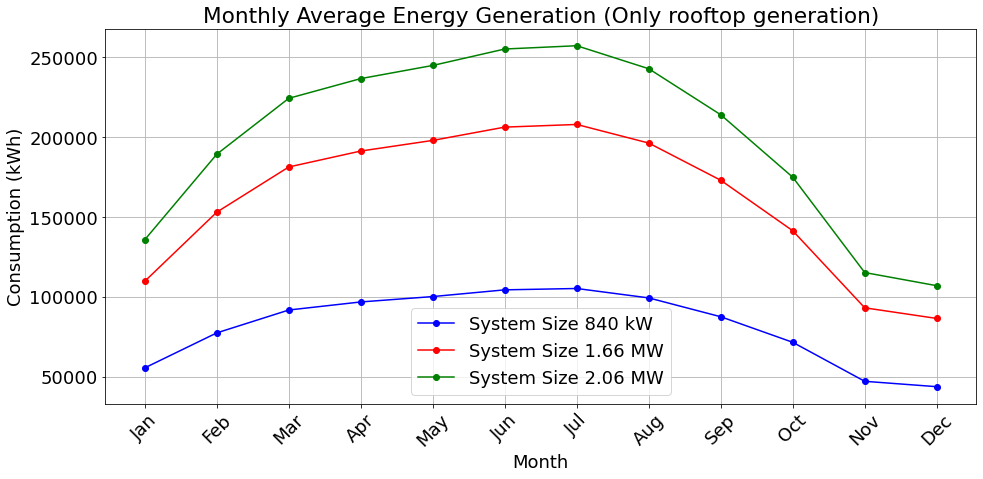

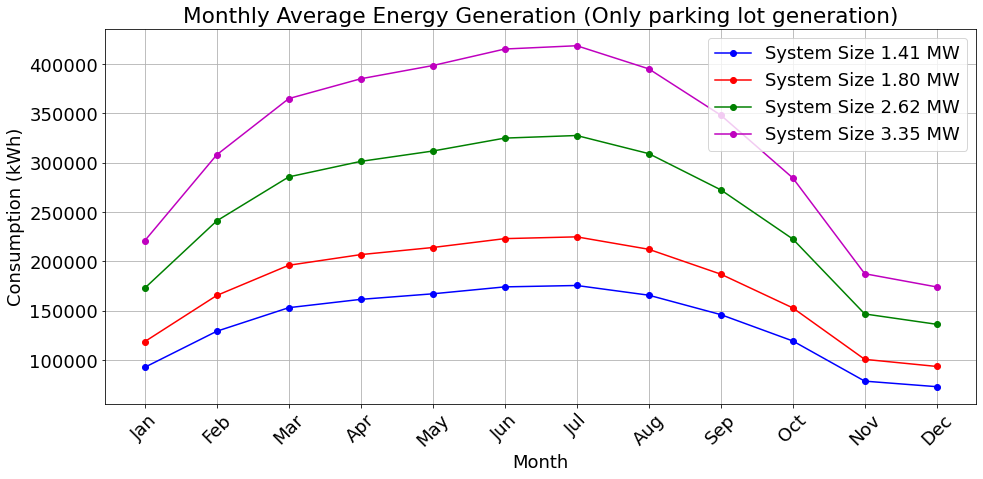

In [29]:
#Plot of the power generated for each configuration and the power consumption of the WRP
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Monthly Average Energy Generation (Only rooftop generation)')
plt.xlabel('Month')
plt.ylabel('Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(months, rtotGen1, marker='o', linestyle='-', color='b', label='System Size 840 kW')
ax1.plot(months, rtotGen2, marker='o', linestyle='-', color='r', label='System Size 1.66 MW')
ax1.plot(months, rtotGen3, marker='o', linestyle='-', color='g', label='System Size 2.06 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()





#Plot of the power generated for each configuration and the power consumption of the WRP
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Monthly Average Energy Generation (Only parking lot generation)')
plt.xlabel('Month')
plt.ylabel('Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(months, ptotGen1, marker='o', linestyle='-', color='b', label='System Size 1.41 MW')
ax1.plot(months, ptotGen2, marker='o', linestyle='-', color='r', label='System Size 1.80 MW')
ax1.plot(months, ptotGen3, marker='o', linestyle='-', color='g', label='System Size 2.62 MW')
ax1.plot(months, ptotGen4, marker='o', linestyle='-', color='m', label='System Size 3.35 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [31]:
projLife = 30 # project lifespan in years
costSol = 450 # approximate $/kW per CANSOLAR
costRoof = 300 # approximate $/kW per Hayter Group
costCarport = costRoof * 10 # approximate $/kW per Hayter Group (OPSUN state 1570 as top of range but that does not include foundation and installation only engineering design)
bat = 2789692.15 # cost of Tesla Megapack in CAD
trans = 388416.66 # https://www.larsonelectronics.com/product/282374/5-mva-pad-mount-transformer-480v-delta-primary-21600y-12470-grounded-wye-secondary-knan-bell-green?utm_campaign=20417422929&utm_source=google&utm_medium=cpc&utm_content=&keyword=&adgroupid=&gad_source=1&gclid=Cj0KCQiAxOauBhCaARIsAEbUSQTmYmdHeF33ObE_SgbDpLif5siC51MRq3I2RXI3Mlt_F6e2AvHPcPkaAg3wEALw_wcB
buyback = [0.1,0.13,0.16,0.19,0.22,0.25,0.28,0.31,0.34,0.37,0.4] # range of buyback pricing from 10 c/kWh to 40 c/kWh


costRoofSys = [i * (costRoof+costSol) + trans  for i in rgen] # cost of installation for just rooftop of WRP
costCarportSys = [i * (costCarport+costSol) + trans  for i in pgen] # cost of installation for rooftop and parking lots of WRP


#Amount of yearly revenue for each config based on the buyback pricing
rrev1 = [i * rtotGen[0] for i in buyback]
rrev2 = [i * rtotGen[1] for i in buyback]
rrev3 = [i * rtotGen[2] for i in buyback]

prev1 = [i * ptotGen[0] for i in buyback]
prev2 = [i * ptotGen[1] for i in buyback]
prev3 = [i * ptotGen[2] for i in buyback]
prev4 = [i * ptotGen[3] for i in buyback]

#Payback period total cost of panels divided by revenue per year
rpayback1 = [costRoofSys[0] / i for i in rrev1]
rpayback2 = [costRoofSys[1] / i for i in rrev2]
rpayback3 = [costRoofSys[2] / i for i in rrev3]

ppayback1 = [costCarportSys[0] / i for i in prev1]
ppayback2 = [costCarportSys[1] / i for i in prev2]
ppayback3 = [costCarportSys[2] / i for i in prev3]
ppayback4 = [costCarportSys[3] / i for i in prev4]

#Find ROI = net return / cost of investments
rROI1 = [i*100*projLife/costRoofSys[0] for i in rev1]
rROI2 = [i*100*projLife/costRoofSys[1] for i in rev2]
rROI3 = [i*100*projLife/costRoofSys[2] for i in rev3]

pROI1 = [i*100*projLife/costCarportSys[0] for i in prev1]
pROI2 = [i*100*projLife/costCarportSys[1] for i in prev2]
pROI3 = [i*100*projLife/costCarportSys[2] for i in prev3]
pROI4 = [i*100*projLife/costCarportSys[3] for i in prev4]

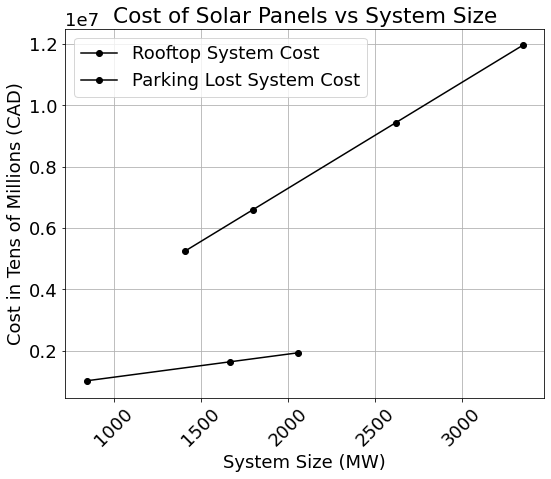

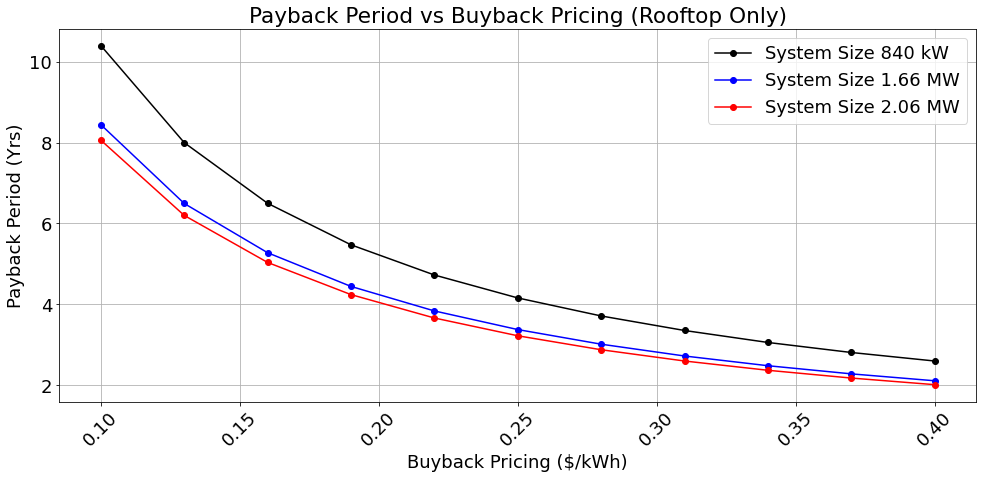

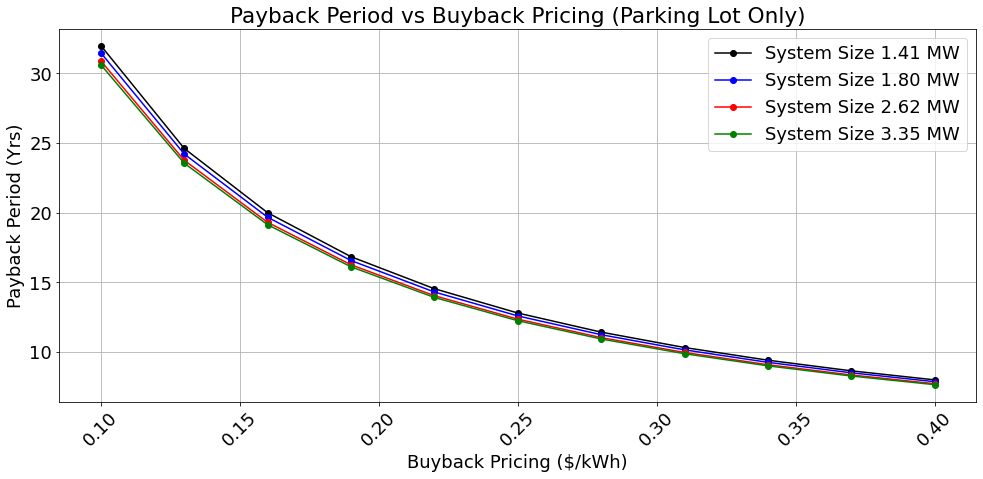

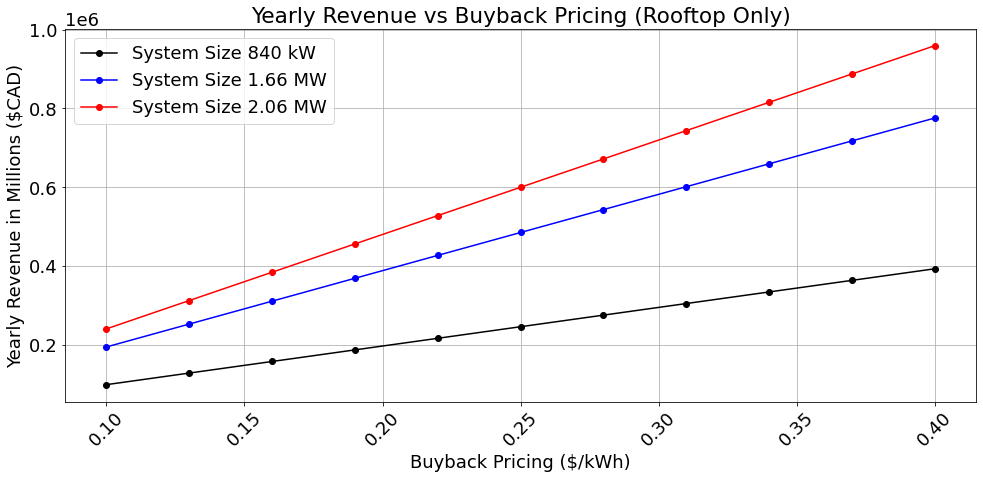

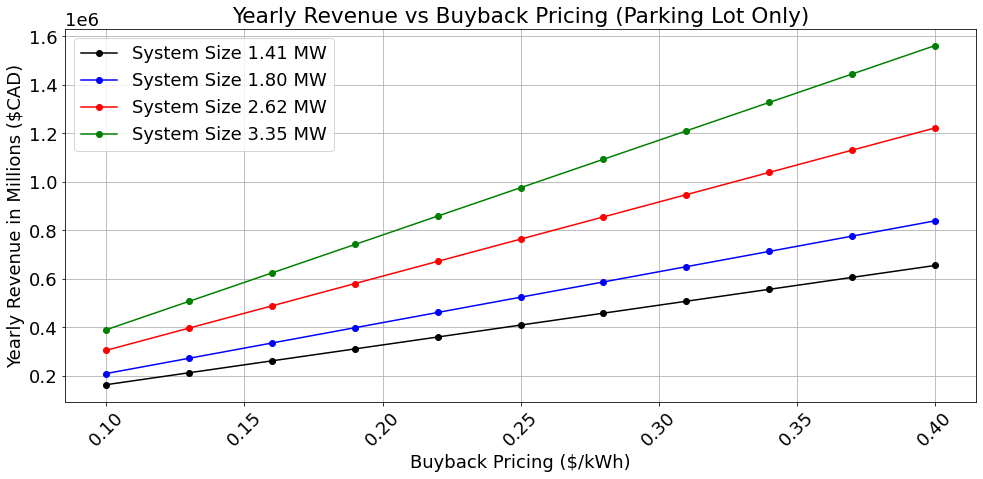

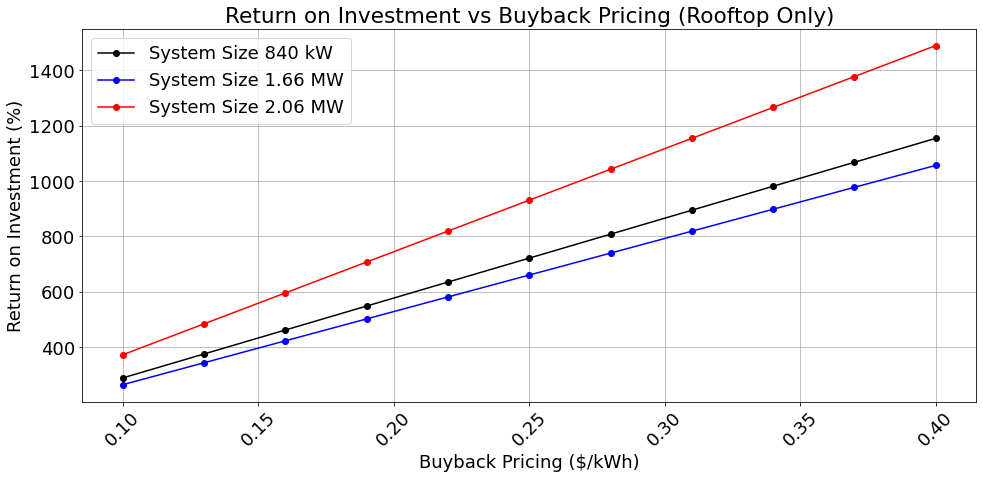

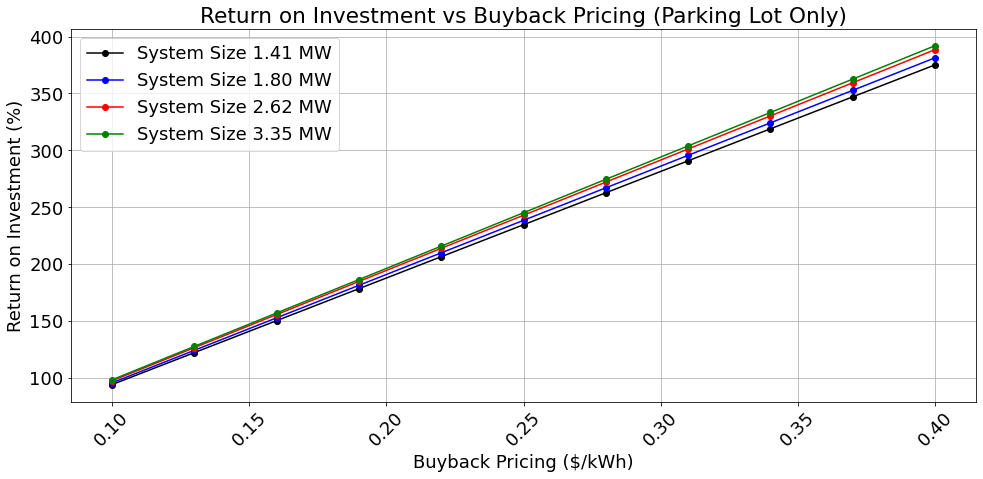

In [33]:
#Plot of the total cost of the solar panels for each configuration
fig, ax1 = plt.subplots(figsize=(8, 7))
plt.title('Cost of Solar Panels vs System Size')
plt.xlabel('System Size (MW)')
plt.ylabel('Cost in Tens of Millions (CAD)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(rgen, costRoofSys, marker='o', linestyle='-', color='k', label='Rooftop System Cost')
ax1.plot(pgen, costCarportSys, marker='o', linestyle='-', color='k', label='Parking Lost System Cost')

plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()





#Plot of the payback period in years for each configuration
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Payback Period vs Buyback Pricing (Rooftop Only)')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Payback Period (Yrs)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, rpayback1, marker='o', linestyle='-', color='k', label='System Size 840 kW')
ax1.plot(buyback, rpayback2, marker='o', linestyle='-', color='b', label='System Size 1.66 MW')
ax1.plot(buyback, rpayback3, marker='o', linestyle='-', color='r', label='System Size 2.06 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


#Plot of the payback period in years for each configuration
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Payback Period vs Buyback Pricing (Parking Lot Only)')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Payback Period (Yrs)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, ppayback1, marker='o', linestyle='-', color='k', label='System Size 1.41 MW')
ax1.plot(buyback, ppayback2, marker='o', linestyle='-', color='b', label='System Size 1.80 MW')
ax1.plot(buyback, ppayback3, marker='o', linestyle='-', color='r', label='System Size 2.62 MW')
ax1.plot(buyback, ppayback4, marker='o', linestyle='-', color='g', label='System Size 3.35 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()






#Plot of the yearly revenue for each configuration with batteries
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Yearly Revenue vs Buyback Pricing (Rooftop Only)')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Yearly Revenue in Millions ($CAD)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, rrev1, marker='o', linestyle='-', color='k', label='System Size 840 kW')
ax1.plot(buyback, rrev2, marker='o', linestyle='-', color='b', label='System Size 1.66 MW')
ax1.plot(buyback, rrev3, marker='o', linestyle='-', color='r', label='System Size 2.06 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Yearly Revenue vs Buyback Pricing (Parking Lot Only)')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Yearly Revenue in Millions ($CAD)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, prev1, marker='o', linestyle='-', color='k', label='System Size 1.41 MW')
ax1.plot(buyback, prev2, marker='o', linestyle='-', color='b', label='System Size 1.80 MW')
ax1.plot(buyback, prev3, marker='o', linestyle='-', color='r', label='System Size 2.62 MW')
ax1.plot(buyback, prev4, marker='o', linestyle='-', color='g', label='System Size 3.35 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()





#Plot of the payback period in years for each configuration
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Return on Investment vs Buyback Pricing (Rooftop Only)')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Return on Investment (%)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, rROI1, marker='o', linestyle='-', color='k', label='System Size 840 kW')
ax1.plot(buyback, rROI2, marker='o', linestyle='-', color='b', label='System Size 1.66 MW')
ax1.plot(buyback, rROI3, marker='o', linestyle='-', color='r', label='System Size 2.06 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Return on Investment vs Buyback Pricing (Parking Lot Only)')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Return on Investment (%)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, pROI1, marker='o', linestyle='-', color='k', label='System Size 1.41 MW')
ax1.plot(buyback, pROI2, marker='o', linestyle='-', color='b', label='System Size 1.80 MW')
ax1.plot(buyback, pROI3, marker='o', linestyle='-', color='r', label='System Size 2.62 MW')
ax1.plot(buyback, pROI4, marker='o', linestyle='-', color='g', label='System Size 3.35 MW')
plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()